In [268]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle
from scipy.io import wavfile
from am_analysis import am_analysis as ama

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [269]:
print(librosa.__version__)

0.10.0.post2


In [270]:
# Depressed utterances from training set
audio_files  = glob('EATD_Corpus_Complete/Training/Utterances_D/*.wav')
paths = {
    "ND" : 'EATD_Corpus_Complete/Training/Utterances_ND/negative*.wav',
    "D" : 'EATD_Corpus_Complete/Training/Utterances_D/positiv*.wav'
}

# Depressed Audio

In [271]:
depressed_audio = glob(paths["D"])[0]
ipd.Audio(depressed_audio)

# Non depressed Audio

In [272]:
non_depressed_audio = glob(paths["ND"])[0]
ipd.Audio(non_depressed_audio)

In [273]:
D_train = glob('EATD_Corpus_Complete/Training/Utterances_D/*.wav')
ND_train = glob('EATD_Corpus_Complete/Training/Utterances_ND/*.wav')
D_test = glob('EATD_Corpus_Complete/Test/Test_D/*.wav')
ND_test = glob('EATD_Corpus_Complete/Test/Test_ND/*.wav')

In [274]:
index =24
print(ND_train[index])
ipd.Audio(ND_train[index])


EATD_Corpus_Complete/Training/Utterances_ND\negative_out_40.wav


# Plot the audio signal

In [275]:
def plot_amp_vs_time(audio_file,title):
    y, sr = librosa.load(audio_file,sr=16000)
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel('Time') 
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

In [276]:
depressed_audio

'EATD_Corpus_Complete/Training/Utterances_D\\positive_out_102.wav'

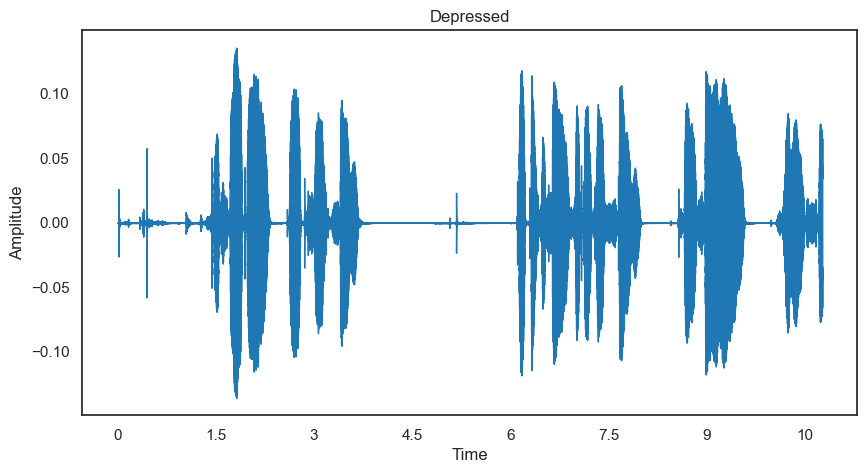

In [277]:
# Depressed 
plot_amp_vs_time(depressed_audio,"Depressed")

In [278]:
non_depressed_audio

'EATD_Corpus_Complete/Training/Utterances_ND\\negative_out_10.wav'

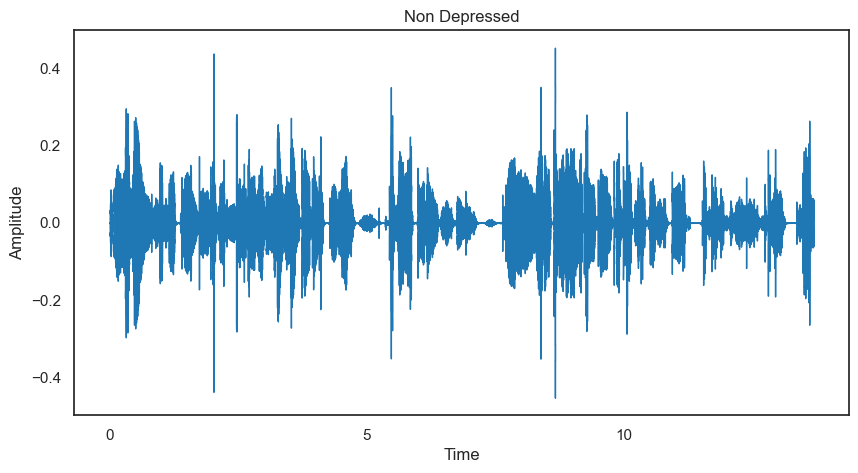

In [279]:
# Non Depressed
plot_amp_vs_time(non_depressed_audio,"Non Depressed")

# Spectrogram by applying STFT

In [280]:
def apply_stft(audio_file,title):
    y, sr = librosa.load(audio_file)
    n_fft = 2048  # Number of FFT points (window size)
    hop_length = 512  # Hop length between windows
    
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    plt.figure(figsize=(12, 6))
    
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft), ref=np.max),
                             sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='log')    
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram '+title)
    plt.show()

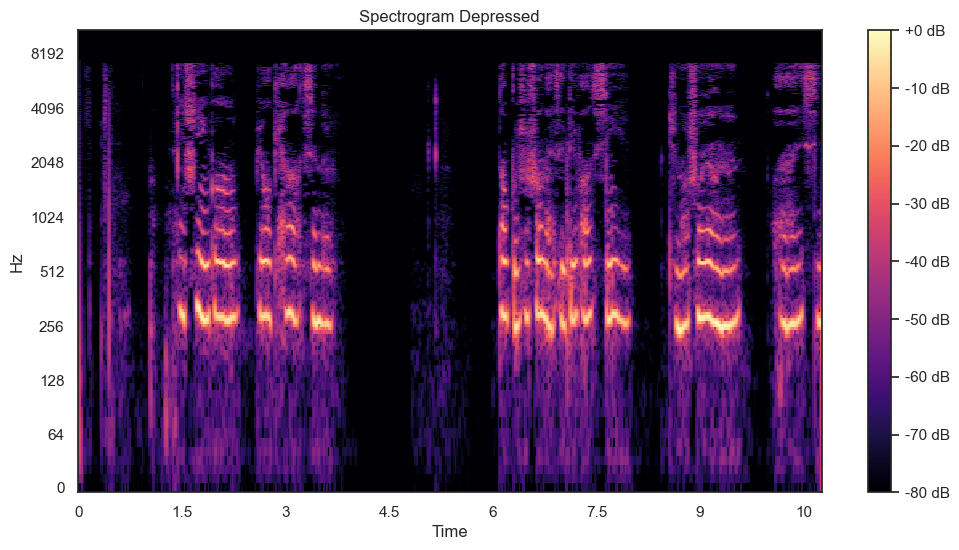

In [281]:
apply_stft(depressed_audio,"Depressed")

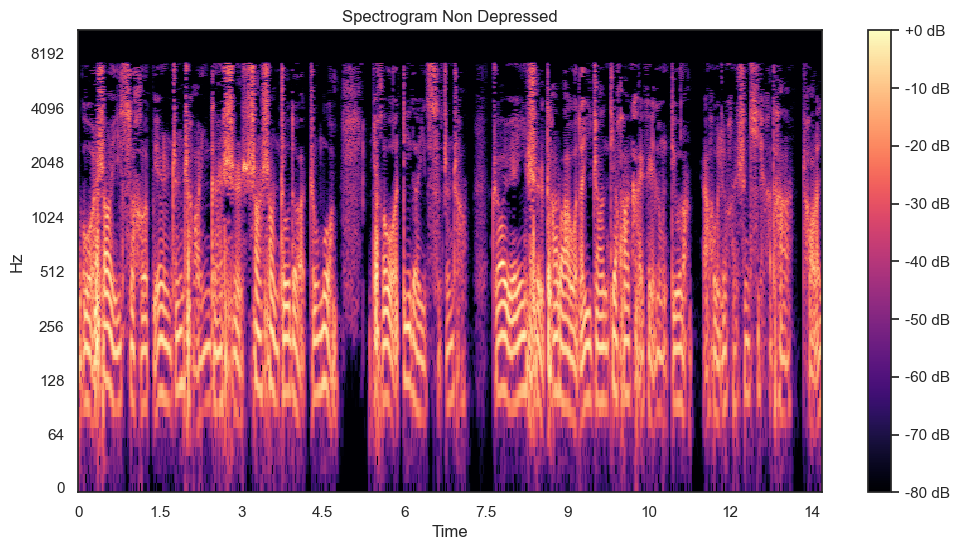

In [282]:
apply_stft(non_depressed_audio,"Non Depressed")

# Mel Spectrogram

In [283]:
def plot_melSpectrogram(audio_file,title):
    y, sr = librosa.load(audio_file)
    
    S = librosa.feature.melspectrogram(y=y,
                                       sr=sr,
                                       n_mels=128 * 2)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(10, 5))
    # Plot the mel spectogram
    img = librosa.display.specshow(S_db_mel,
                                  x_axis='time',
                                  y_axis='log',
                                  ax=ax)
    ax.set_title('Mel Spectogram Example '+title, fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

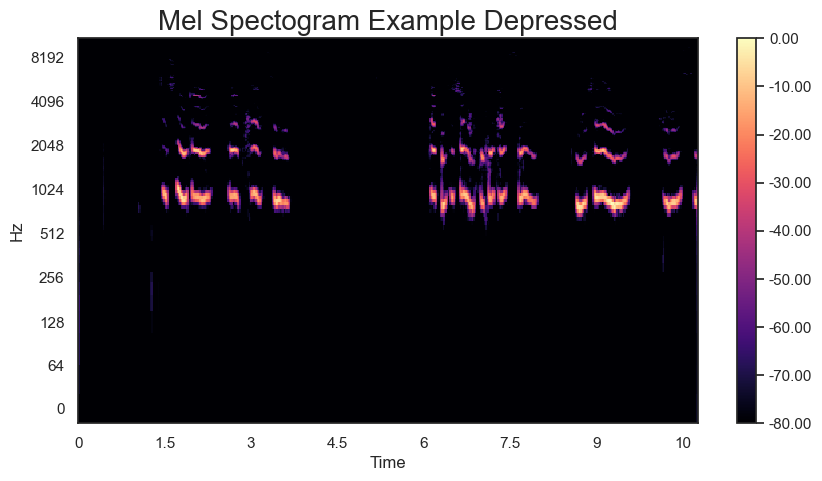

In [284]:
plot_melSpectrogram(depressed_audio,"Depressed")

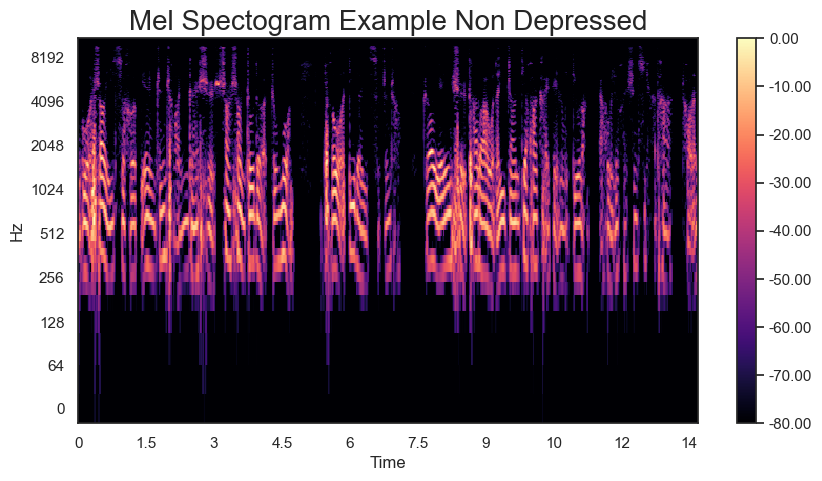

In [285]:
plot_melSpectrogram(non_depressed_audio,"Non Depressed")